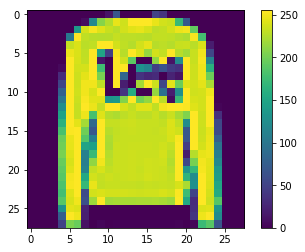

Epoch 1/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4974 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3716 - acc: 0.8659
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3352 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3105 - acc: 0.8852
Epoch 5/5
10000/10000 [==============================] - 0s 27us/sample - loss: 0.3624 - acc: 0.8673
Test accuracy: 0.8673
a= [8051 5988 2719 1555 8080 8724 9018 9509 5048 5481]


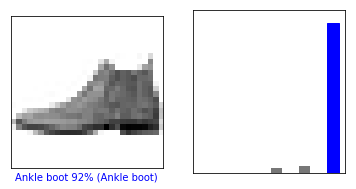

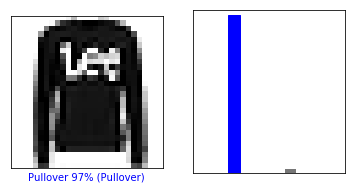

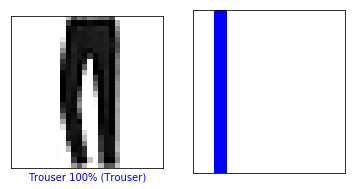

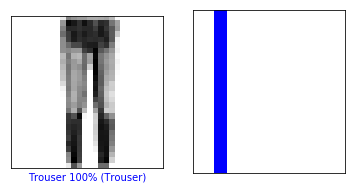

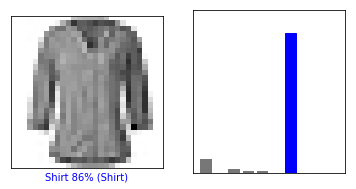

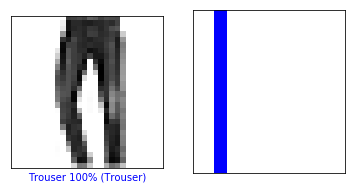

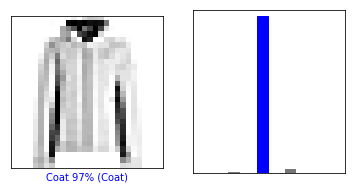

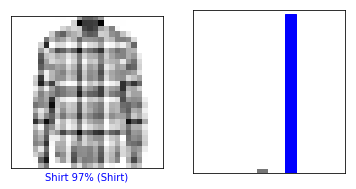

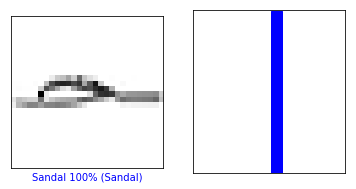

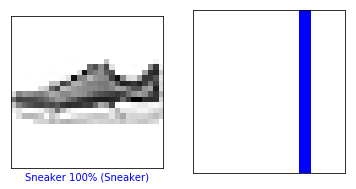

In [29]:
"""(1)Import the Fashion MNIST dataset..."""

#from __future__ import absolute_import, division, print_function, unicode_literals,os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# In[ ]:


"""(2) Explore the data..."""

train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)


# In[ ]:


"""Preprocess the data..."""

# Inspect a image in trainging set
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Scale these values by dividing them by 255
train_images = train_images / 255.0
test_images = test_images / 255.0


# In[ ]:


"""(3) Setup three layers..."""

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),# from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels
    keras.layers.Dense(128, activation=tf.nn.relu),# 128 nodes
    keras.layers.Dense(10, activation=tf.nn.softmax)# 10-node softmax layer
])


# In[ ]:


"""(4) Compile the model..."""

model.compile(optimizer='adam',# model is updated based on the data it sees and its loss function
              loss='sparse_categorical_crossentropy',# to minimize this function to "steer" the model in the right direction
              metrics=['accuracy'])# to monitor the training and testing steps


# In[ ]:


"""(5) Train the model..."""

# Feed the training data to the model
# The model learns to associate images and labels
# Ask the model to make predictions about a test set
model.fit(train_images, train_labels, epochs=5) # Call the model.fit method—the model is "fit" to the training data


# In[ ]:


"""(6) Evaluate the performance..."""

test_loss, test_acc = model.evaluate(test_images, test_labels)# compare how the model performs on the test dataset
print('Test accuracy:', test_acc)

"""Make prediction..."""

predictions = model.predict(test_images) # Use the trained model to make predictions about some images

# Graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
# Plot 10 randomly selected testing images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
a = np.random.randint(0, len(test_labels), 10)
print('a=',a) 
for i in range(0,10):
  b = a[i]
  plt.figure(figsize=(6, 3))
  plt.subplot(1, 2, 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(1, 2, 2)
  plot_value_array(i, predictions, test_labels)
plt.show()